# Nội Dung
Trong notebook này, chúng ta sẽ thực hiện **Exploratory Data Analysis (EDA)** cho bộ dữ liệu **Online Retail**.


## Import thư viện

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Đọc dữ liệu & tổng quan

In [2]:
df = pd.read_excel("data/Online_Retail.xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Online_Retail.xlsx'

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Kiểm tra & xử lý dữ liệu

In [ ]:

print("\nSố lượng missing values:")
df.isnull().sum()



Số lượng missing values:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

## Phân tích cơ bản

In [ ]:

print("\n Top 10 quốc gia có nhiều đơn hàng nhất:")
print(df['Country'].value_counts().head(10))

print("\n Top 10 sản phẩm bán nhiều nhất:")
print(df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10))



 Top 10 quốc gia có nhiều đơn hàng nhất:
Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64

 Top 10 sản phẩm bán nhiều nhất:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


## Trực quan hóa dữ liệu

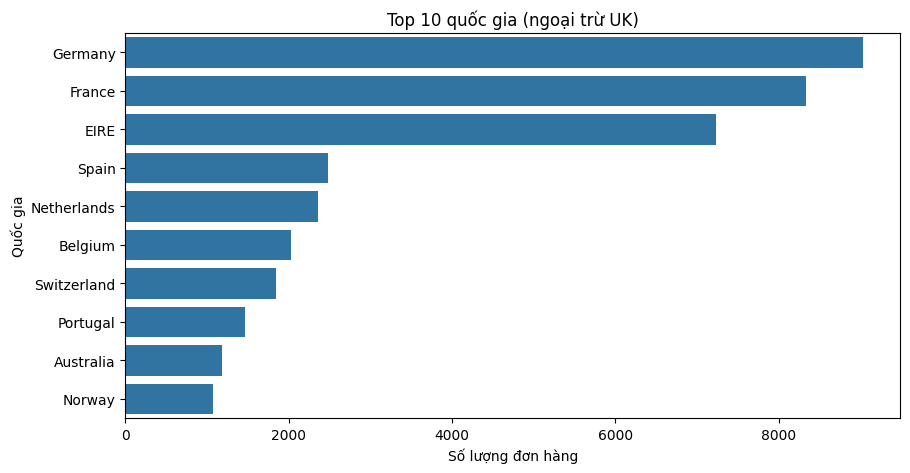

In [ ]:

top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 quốc gia (ngoại trừ UK)")
plt.xlabel("Số lượng đơn hàng")
plt.ylabel("Quốc gia")
plt.show()


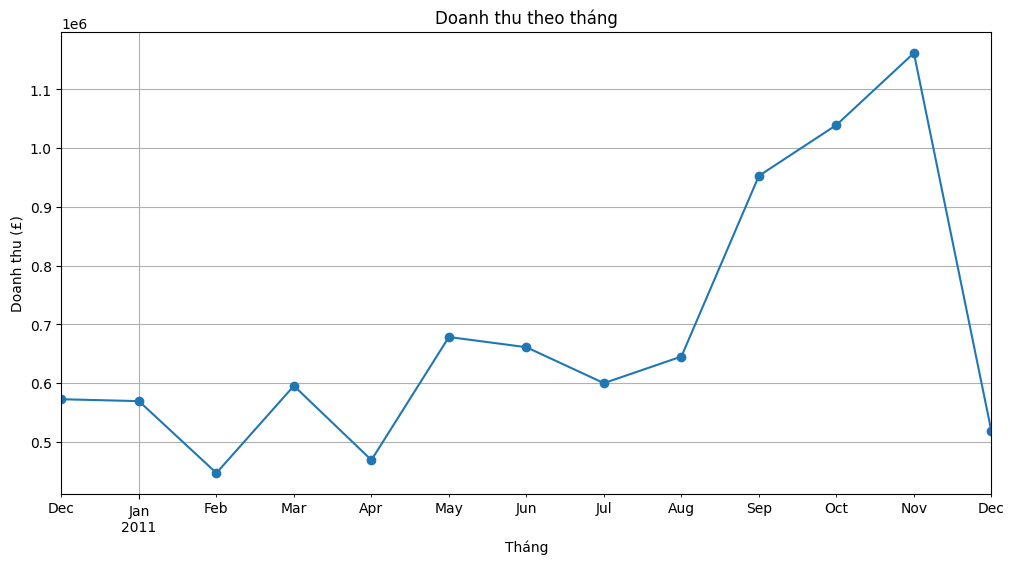

In [ ]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (£)")
plt.grid(True)
plt.show()
